# Introduction to Time Series Clustering

## Datos de precios de electricidad

Actualización a febrero de 2024

In [2]:
#
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 7.4 MB/s eta 0:00:00


## 2. Análisis

### 2.1. Dependencias y Datos

In [3]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 200)
import os
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = [ 'xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green',
           'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod',
           'xkcd:cadet blue', 'xkcd:scarlet']
from tslearn.clustering import TimeSeriesKMeans

#
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Opciones de visualizació de cifras:
pd.options.display.float_format = '{:,.2f}'.format #'${:,.2f}'

In [5]:
#

time_series_data = pd.read_csv('Datos_PML_Wide.csv')

time_series_data['Hora'] = time_series_data['Hora'] - 1 # para que la primera hora sea 0 y no 1

time_series_data['Periodo'] = pd.to_datetime( time_series_data['Fecha'] + ' ' + \
                                              time_series_data['Hora'].astype(str) + ':00:00')


time_series_data.head()

,Fecha,Hora,05FZA-115,04FMA-115,05AEP-115,06PRY-115,02SNS-115,03SLD-230,08PPO-115,03ING-69,06LBR-115,02LAV-400,02CJT-115,03IMP-115,03CNS-69,03RIG-115,05DGN-115,06RIB-138,04DYN-115,05SFB-115,04ORI-115,03AYL-115,03GKN-115,01PXA-85,05LGS-115,04EFR-230,02CIV-115,06MON-230,02ADD-115,01XOC-230,01TQC-115,08LAC-115,06MTN-115,05AMN-115,03GUD-69,06OVO-115,01TYA-230,03HYL-69,05LEX-115,02MDB-230,02MTL-115,03MIL-69,04TSR-115,06CYC-115,06MMD-230,02TPS-115,03COC-69,04CBA-115,03VYQ-115,05FXD-115,02RNA-115,03SPL-115,03NKA-69,04CUN-115,06MIG-138,04COC-115,03ZID-115,08SLC-230,01JDV-85,02ECM-115,03APZ-115,04LCH-115,05ISD-115,02MHT-115,06CMN-115,03UPT-115,05ALT-115,02TTP-115,06TMO-115,02CNJ-115,06CDT-115,02LMX-115,01AUR-230,01ATE-85,06PBS-115,03SEI-115,04CUS-115,01CTT-85,02KIM-115,02OWC-115,08CBU-115,06AUA-138,01NAU-85,05ARM-115,01ECA-230,01IXL-230,05CEJ-115,08NIZ-115,03ZLT-69,01ATU-115,05TBL-115,03TSM-115,05OAS-115,04SBK-115,05VEZ-115,06REY-138,03VAR-115,03MXT-115,02LRZ-115,04CUT-115,02MRO-115,05LEO-115,03LAS-115,03DEO-115,02PUE-115,06ALM-115,05DGD-115,01AVT-85,06POL-115,04GSV-115,08CAS-115,05SGP-115,02MID-400,06CYN-115,03LRE-115,03ABL-115,02HCO-115,03PUU-69,01TDK-230,02RBO-115,06LDC-115,06CIM-138,Periodo
0,2024-12-01,0,565.06,481.66,383.84,453.56,910.54,852.83,"1,077.45",939.15,937.86,899.27,"1,029.60",866.26,815.56,808.66,566.21,447.25,469.85,481.01,493.38,810.56,865.66,917.94,564.49,424.44,930.14,461.86,964.48,918.71,927.36,"1,063.27",771.77,655.26,810.90,"1,040.38",922.41,817.35,385.88,916.93,987.37,826.49,553.95,514.50,907.78,939.77,815.53,477.24,907.52,387.06,920.58,839.25,810.88,554.53,456.08,487.49,853.24,"1,008.43",926.33,932.40,877.39,492.78,443.43,992.02,462.66,862.31,445.30,957.17,908.89,977.29,766.10,967.42,915.62,927.43,578.95,861.98,556.64,922.71,931.20,923.93,"1,044.69",442.58,918.35,469.70,913.71,916.08,386.26,"1,067.27",813.42,921.08,444.00,861.98,496.11,486.91,421.78,449.60,904.13,843.73,917.58,553.84,908.68,456.38,808.27,862.23,"1,069.34",499.96,630.46,927.94,910.62,513.66,"1,031.43",704.19,958.56,753.29,811.73,844.82,992.70,926.90,926.94,933.03,906.00,440.00,2024-12-01 00:00:00
1,2024-12-01,1,465.03,413.33,366.18,433.44,557.52,541.56,660.70,591.78,561.91,552.08,631.48,550.56,530.72,542.99,463.80,426.87,407.68,430.46,424.80,525.22,546.50,566.74,461.91,387.67,574.19,433.93,592.14,566.99,575.75,650.84,506.57,484.70,527.20,563.86,569.76,531.00,367.41,565.36,610.88,536.80,451.14,451.53,541.26,577.33,529.75,415.45,568.33,368.07,565.98,538.62,528.80,451.48,432.12,414.76,544.16,618.13,572.23,573.81,556.90,424.45,407.18,608.34,436.03,548.37,408.09,588.55,542.41,599.08,497.90,593.21,564.98,573.21,460.15,547.40,452.74,570.02,573.09,569.44,639.89,425.95,567.04,421.14,563.92,565.21,367.94,653.28,529.18,571.22,407.53,545.29,437.19,417.86,391.19,428.23,572.92,547.85,565.93,451.08,557.70,415.41,537.95,545.35,655.23,446.51,469.34,573.54,542.72,427.51,631.94,514.75,588.67,495.35,528.74,540.41,608.45,584.69,572.74,574.24,539.52,422.81,2024-12-01 01:00:00
2,2024-12-01,2,446.18,390.60,352.17,425.29,512.39,502.39,605.03,545.49,515.84,507.75,581.09,509.15,493.00,507.94,445.12,418.61,385.45,414.50,400.77,488.12,506.19,521.45,443.57,367.45,528.24,424.85,545.26,521.64,530.19,596.32,472.99,458.63,489.86,508.44,524.25,493.31,353.30,520.11,560.94,498.45,424.67,438.80,497.15,531.07,492.12,392.40,524.41,353.83,520.18,499.98,491.34,424.96,423.26,391.70,504.03,567.85,526.38,527.66,514.68,400.46,393.16,558.69,427.12,507.24,393.70,541.44,498.09,549.89,464.15,544.93,519.82,527.43,441.75,507.80,426.12,524.43,527.09,523.77,586.83,420.38,521.75,405.80,518.84,520.03,353.93,597.89,491.45,526.00,393.47,504.05,420.43,394.49,376.26,419.83,530.97,509.27,520.66,424.61,513.16,400.59,502.36,504.05,600.36,434.95,444.62,527.72,498.47,403.09,579.89,485.75,542.13,462.65,491.34,500.66,558.32,539.08,527.00,527.98,495.58,414.84,2024-12-01 02:00:00
3,2024-12-01,3,439.02,384.03,343.33,420.10,500.95,492.38,586.78,532.71,505.16,495.07,563.33,498.13,483.35,498.21,438.03,413.69,378.64,

In [6]:
#

time_series_data.tail()

,Fecha,Hora,05FZA-115,04FMA-115,05AEP-115,06PRY-115,02SNS-115,03SLD-230,08PPO-115,03ING-69,06LBR-115,02LAV-400,02CJT-115,03IMP-115,03CNS-69,03RIG-115,05DGN-115,06RIB-138,04DYN-115,05SFB-115,04ORI-115,03AYL-115,03GKN-115,01PXA-85,05LGS-115,04EFR-230,02CIV-115,06MON-230,02ADD-115,01XOC-230,01TQC-115,08LAC-115,06MTN-115,05AMN-115,03GUD-69,06OVO-115,01TYA-230,03HYL-69,05LEX-115,02MDB-230,02MTL-115,03MIL-69,04TSR-115,06CYC-115,06MMD-230,02TPS-115,03COC-69,04CBA-115,03VYQ-115,05FXD-115,02RNA-115,03SPL-115,03NKA-69,04CUN-115,06MIG-138,04COC-115,03ZID-115,08SLC-230,01JDV-85,02ECM-115,03APZ-115,04LCH-115,05ISD-115,02MHT-115,06CMN-115,03UPT-115,05ALT-115,02TTP-115,06TMO-115,02CNJ-115,06CDT-115,02LMX-115,01AUR-230,01ATE-85,06PBS-115,03SEI-115,04CUS-115,01CTT-85,02KIM-115,02OWC-115,08CBU-115,06AUA-138,01NAU-85,05ARM-115,01ECA-230,01IXL-230,05CEJ-115,08NIZ-115,03ZLT-69,01ATU-115,05TBL-115,03TSM-115,05OAS-115,04SBK-115,05VEZ-115,06REY-138,03VAR-115,03MXT-115,02LRZ-115,04CUT-115,02MRO-115,05LEO-115,03LAS-115,03DEO-115,02PUE-115,06ALM-115,05DGD-115,01AVT-85,06POL-115,04GSV-115,08CAS-115,05SGP-115,02MID-400,06CYN-115,03LRE-115,03ABL-115,02HCO-115,03PUU-69,01TDK-230,02RBO-115,06LDC-115,06CIM-138,Periodo
1483,2025-01-31,19,"1,790.12","1,284.64","1,408.93","1,877.69","2,191.83","2,102.97","2,389.31","2,612.61","2,129.33","2,160.89","2,484.97","2,315.35","2,200.47","2,188.25","1,793.41","1,792.92","1,333.64","1,701.89","1,400.82","2,176.52","2,228.81","2,255.91","1,790.53","1,293.97","2,282.80","1,870.00","2,253.50","2,260.00","2,310.13","2,477.35","1,957.59","1,820.15","2,179.85","1,986.91","2,276.50","2,199.60","1,416.43","2,238.12","2,452.24","2,229.30","1,461.13","1,921.52","2,024.73","2,250.48","2,196.26","1,364.56","2,248.69","1,416.80","2,242.36","2,206.13","2,187.58","1,463.13","1,854.25","1,310.50","2,257.35","2,298.67","2,260.86","2,247.55","2,353.54","1,399.03","1,609.40","2,477.73","1,894.61","2,298.08","1,620.09","2,288.30","2,057.38","2,436.25","1,878.59","2,299.04","2,249.13","2,289.59","1,888.17","2,104.04","1,468.93","2,263.28","2,240.84","2,250.42","2,428.46","1,880.01","2,257.68","1,676.30","2,244.83","2,250.15","1,400.05","2,472.19","2,192.83","2,284.65","1,611.82","2,249.66","1,733.11","1,331.96","1,517.67","1,819.21","2,236.42","2,289.41","2,229.89","1,461.22","2,178.22","1,643.39","2,192.44","2,249.48","2,742.91","1,907.98","1,702.27","2,290.13","2,045.99","1,370.23","2,392.46","1,937.40","2,241.39","1,879.69","2,166.03","2,230.86","2,485.09","2,592.55","2,286.01","2,250.76","2,016.60","1,821.62",2025-01-31 19:00:00
1484,2025-01-31,20,"1,500.76",998.43,"1,154.52","1,618.64","1,938.33","1,851.09","2,166.93","2,302.29","1,870.24","1,915.20","2,207.66","2,050.07","1,958.18","1,898.25","1,503.72","1,542.70","1,047.04","1,390.12","1,117.77","1,933.50","1,970.84","1,998.45","1,501.68","1,032.52","2,024.44","1,605.55","2,010.34","2,002.37","2,049.46","2,241.00","1,692.01","1,502.33","1,939.24","1,735.23","2,016.80","1,956.61","1,161.29","1,982.51","2,183.81","1,983.48","1,132.33","1,657.32","1,781.82","2,001.16","1,953.57","1,084.41","1,987.13","1,161.48","1,983.86","1,947.66","1,947.49","1,134.19","1,590.49","1,014.16","2,000.38","2,109.78","2,002.79","1,994.27","2,081.27","1,116.10","1,307.72","2,196.20","1,633.41","2,035.06","1,318.20","2,028.71","1,811.20","2,167.83","1,621.54","2,047.42","1,992.64","2,028.89","1,628.75","1,852.53","1,139.28","2,004.95","1,988.58","1,993.20","2,198.87","1,601.20","2,000.02","1,369.92","1,988.59","1,993.61","1,146.37","2,251.63","1,951.49","2,025.72","1,310.05","1,991.30","1,419.02","1,045.07","1,233.17","1,561.90","1,968.76","2,014.49","1,977.10","1,132.55","1,941.40","1,336.78","1,913.70","1,991.22","2,437.11","1,643.11","1,395.21","2,029.39","1,800.19","1,056.38","2,166.03","1,605.68","1,999.83","1,622.54","1,917.70","1,978.99","2,210.93","2,283.62","2,025.63","1,996.97","1,774.16","1,568.11",2025-01-31 20:00:00
1485,2025-01-31,21,"2,027.12",497.31,"1,204.26","2,025.26","2,363.21","2,267.37",

In [7]:
# Extraemos nombres de nodos:

Nodos_list = time_series_data.columns.tolist()[ 2 : time_series_data.shape[1] - 1]

Nodos_list

['05FZA-115',
 '04FMA-115',
 '05AEP-115',
 '06PRY-115',
 '02SNS-115',
 '03SLD-230',
 '08PPO-115',
 '03ING-69',
 '06LBR-115',
 '02LAV-400',
 '02CJT-115',
 '03IMP-115',
 '03CNS-69',
 '03RIG-115',
 '05DGN-115',
 '06RIB-138',
 '04DYN-115',
 '05SFB-115',
 '04ORI-115',
 '03AYL-115',
 '03GKN-115',
 '01PXA-85',
 '05LGS-115',
 '04EFR-230',
 '02CIV-115',
 '06MON-230',
 '02ADD-115',
 '01XOC-230',
 '01TQC-115',
 '08LAC-115',
 '06MTN-115',
 '05AMN-115',
 '03GUD-69',
 '06OVO-115',
 '01TYA-230',
 '03HYL-69',
 '05LEX-115',
 '02MDB-230',
 '02MTL-115',
 '03MIL-69',
 '04TSR-115',
 '06CYC-115',
 '06MMD-230',
 '02TPS-115',
 '03COC-69',
 '04CBA-115',
 '03VYQ-115',
 '05FXD-115',
 '02RNA-115',
 '03SPL-115',
 '03NKA-69',
 '04CUN-115',
 '06MIG-138',
 '04COC-115',
 '03ZID-115',
 '08SLC-230',
 '01JDV-85',
 '02ECM-115',
 '03APZ-115',
 '04LCH-115',
 '05ISD-115',
 '02MHT-115',
 '06CMN-115',
 '03UPT-115',
 '05ALT-115',
 '02TTP-115',
 '06TMO-115',
 '02CNJ-115',
 '06CDT-115',
 '02LMX-115',
 '01AUR-230',
 '01ATE-85',
 '

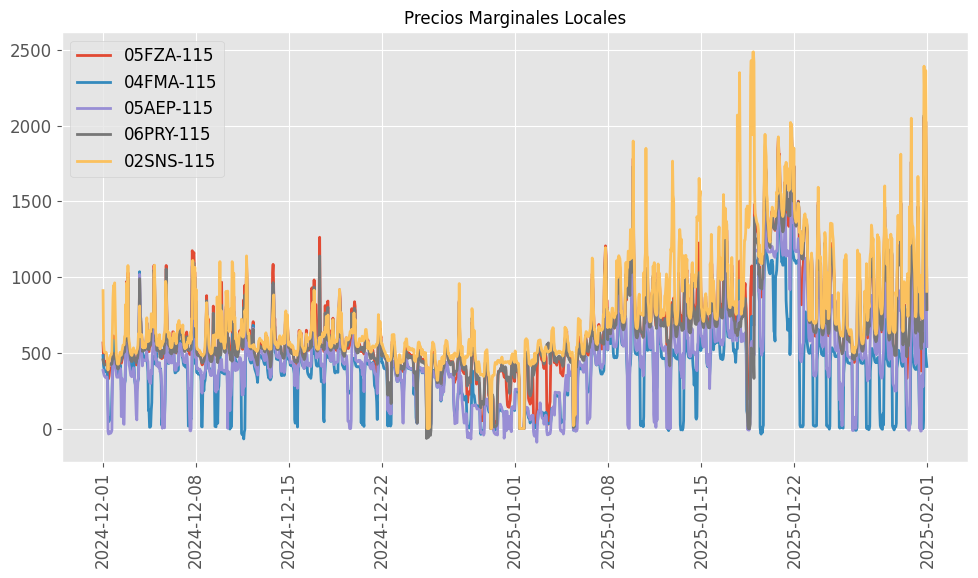

In [8]:
# Plot inicial

# Series Selección

plt.figure(figsize=(10, 6))

# Agrega cada serie de datos como una línea en el gráfico
plt.plot( time_series_data['Periodo'], time_series_data[ Nodos_list[0] ], label = Nodos_list[0])
plt.plot( time_series_data['Periodo'], time_series_data[ Nodos_list[1] ], label = Nodos_list[1])
plt.plot( time_series_data['Periodo'], time_series_data[ Nodos_list[2] ], label = Nodos_list[2])
plt.plot( time_series_data['Periodo'], time_series_data[ Nodos_list[3] ], label = Nodos_list[3])
plt.plot( time_series_data['Periodo'], time_series_data[ Nodos_list[4] ], label = Nodos_list[4])

# Configura el título y las leyendas
plt.title('Precios Marginales Locales')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation = 90)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()
plt.show()

### 2.2 Agrupación

Como siempre, generar, conseguir o procesar los datos es lo complicado, el modelo es algo así:

In [9]:
#

data_array = np.array( time_series_data.T.drop( ['Periodo', 'Fecha', 'Hora'] ).values )

data_array

array([[565.06, 465.03, 446.18, ..., 2027.12, 1585.61, 789.62],
       [481.66, 413.33, 390.6, ..., 497.31, 456.34, 409.94],
       [383.84, 366.18, 352.17, ..., 1204.26, 954.05, 541.05],
       ...,
       [933.03, 574.24, 527.98, ..., 2452.77, 1935.08, 947.62],
       [906.0, 539.52, 495.58, ..., 2175.52, 1706.12, 836.27],
       [440.0, 422.81, 414.84, ..., 1959.18, 1538.78, 761.48]],
      dtype=object)

In [10]:
#

model = TimeSeriesKMeans( n_clusters = 2, metric = "dtw", max_iter = 10)
#metric{“euclidean”, “dtw”, “softdtw”} (default: “euclidean”)

model.fit(data_array)

TimeSeriesKMeans(max_iter=10, metric='dtw', n_clusters=2)

In [11]:
model.inertia_ #model.labels_

np.float64(20088977.466974463)

In [12]:
#

clusters = []

#
for i in range(1, 11):
    km = TimeSeriesKMeans( n_clusters = i, metric = "dtw", max_iter = 10 ).fit( data_array )
    clusters.append( km.inertia_ )


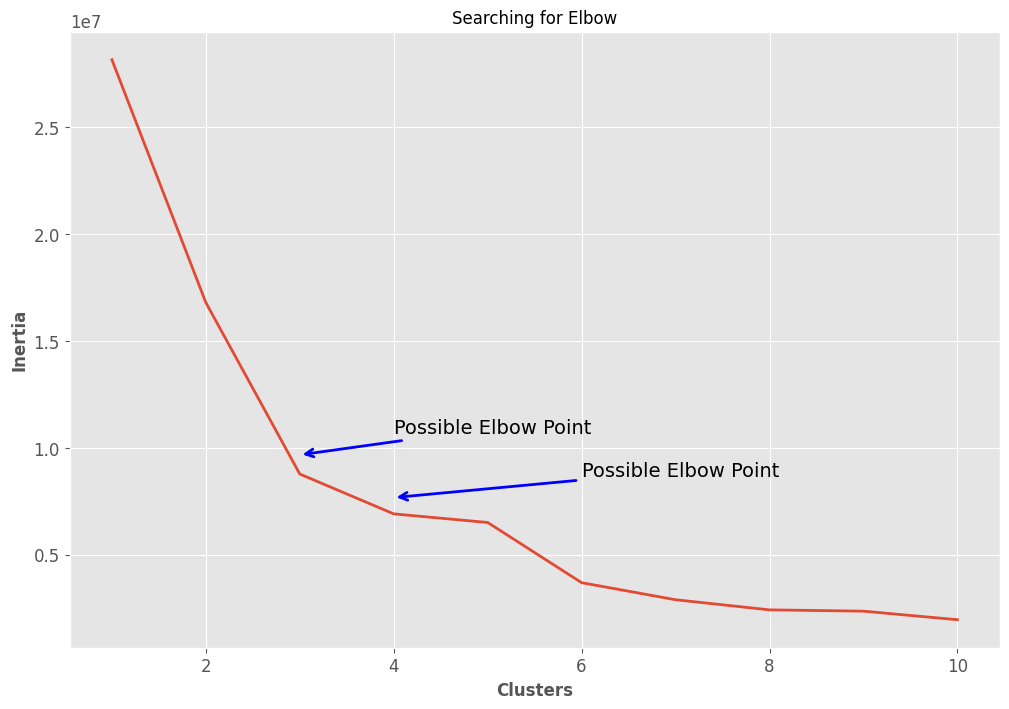

In [13]:
#
fig, ax = plt.subplots( figsize = (12, 8) )
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy = (3, 9674457), xytext = (4, 10674457), xycoords = 'data',
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

ax.annotate('Possible Elbow Point', xy = (4, 7674457), xytext = (6, 8674457), xycoords = 'data',
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

plt.show()

In [14]:
# selección Final:

#

model = TimeSeriesKMeans( n_clusters = 3, metric = "dtw", max_iter = 10)
#metric{“euclidean”, “dtw”, “softdtw”} (default: “euclidean”)

model.fit(data_array)

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [15]:
#

Nodos = time_series_data.T.drop( ['Periodo', 'Fecha', 'Hora'] ).index.tolist()

Nodos

['05FZA-115',
 '04FMA-115',
 '05AEP-115',
 '06PRY-115',
 '02SNS-115',
 '03SLD-230',
 '08PPO-115',
 '03ING-69',
 '06LBR-115',
 '02LAV-400',
 '02CJT-115',
 '03IMP-115',
 '03CNS-69',
 '03RIG-115',
 '05DGN-115',
 '06RIB-138',
 '04DYN-115',
 '05SFB-115',
 '04ORI-115',
 '03AYL-115',
 '03GKN-115',
 '01PXA-85',
 '05LGS-115',
 '04EFR-230',
 '02CIV-115',
 '06MON-230',
 '02ADD-115',
 '01XOC-230',
 '01TQC-115',
 '08LAC-115',
 '06MTN-115',
 '05AMN-115',
 '03GUD-69',
 '06OVO-115',
 '01TYA-230',
 '03HYL-69',
 '05LEX-115',
 '02MDB-230',
 '02MTL-115',
 '03MIL-69',
 '04TSR-115',
 '06CYC-115',
 '06MMD-230',
 '02TPS-115',
 '03COC-69',
 '04CBA-115',
 '03VYQ-115',
 '05FXD-115',
 '02RNA-115',
 '03SPL-115',
 '03NKA-69',
 '04CUN-115',
 '06MIG-138',
 '04COC-115',
 '03ZID-115',
 '08SLC-230',
 '01JDV-85',
 '02ECM-115',
 '03APZ-115',
 '04LCH-115',
 '05ISD-115',
 '02MHT-115',
 '06CMN-115',
 '03UPT-115',
 '05ALT-115',
 '02TTP-115',
 '06TMO-115',
 '02CNJ-115',
 '06CDT-115',
 '02LMX-115',
 '01AUR-230',
 '01ATE-85',
 '

In [16]:
# Prediciendo clases

y = model.predict(data_array)

y

array([1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [17]:
#

x = time_series_data.Periodo

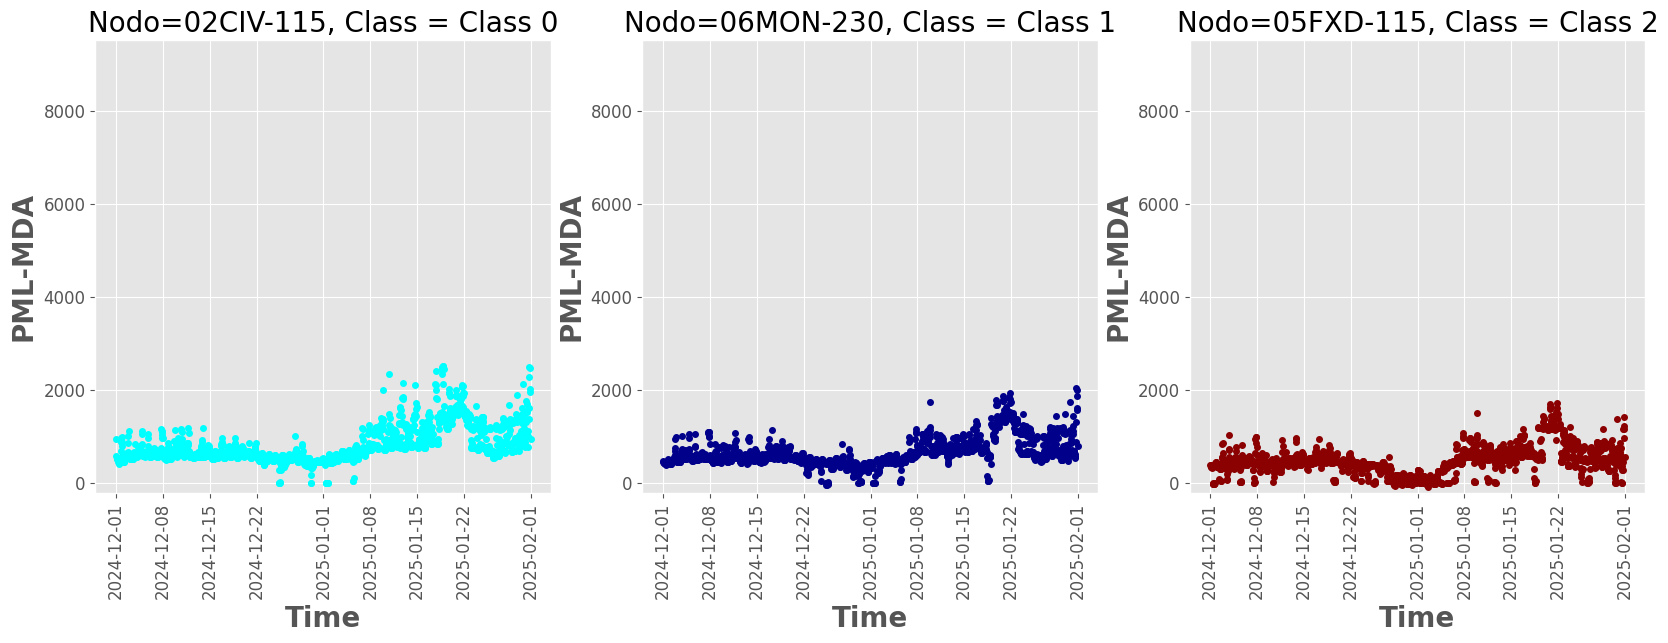

In [22]:
plt.figure( figsize = (20,20) )

k_dict = {'1':0,'2':1,'3':2} # Diccionario de labels, corrected

colors = ['cyan', 'darkblue', 'darkred']

Names = ['Class 0', 'Class 1', 'Class 2']

for j in range(1,4):
    plt.subplot( 3, 3, j)

    k = np.random.choice( np.where( y == k_dict[ str(j) ] )[0] ) # Selección aleatoria de casos

    plt.plot( x, data_array[k], '.' ,color = colors[j-1] )
    plt.ylabel( 'PML-MDA', fontsize = 20 )
    plt.xlabel( 'Time', fontsize = 20)
    plt.title( 'Nodo=%s, Class = %s'%(Nodos[k], Names[j-1]), fontsize = 20)
    plt.ylim( data_array.min(), data_array.max() )
    plt.xticks(rotation = 90) # Rotate x-axis labels vertically

In [20]:
# Datos Finales
data = {
    'Nodo': Nodos,
    'Grupo': y
}

df_Final = pd.DataFrame( data )

df_Final

,Nodo,Grupo
0,05FZA-115,1
1,04FMA-115,2
2,05AEP-115,2
3,06PRY-115,1
4,02SNS-115,0
...,...,...
115,03PUU-69,0
116,01TDK-230,0
117,02RBO-115,0
118,06LDC-115,1


In [21]:
# To CSV

df_Final.to_csv( 'Cluster_Nodos.csv', index = False )